<a href="https://colab.research.google.com/github/princetondalmet/Clothing-Apparel-Prediction/blob/main/Clothing%20Apparel%20Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [140]:
#Import necessary Libraries
import numpy as np
from keras.datasets import fashion_mnist

In [141]:
# Load fashion MNIST dataset
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [142]:
# Explore the dataset
# Check the shape and size of x_train, x_test, y_train, y_test
print ("Number of samples/observations in training data: " + str(len(x_train)))
print ("Number of labels in training data: " + str(len(y_train)))
print ("Dimensions of a single image in x_train:" + str(x_train[0].shape))
print("-------------------------------------------------------------")
print ("Number of samples/observations in test data: " + str(len(x_test)))
print ("Number of labels in test data: " + str(len(y_test)))
print ("Dimensions of single image in x_test:" + str(x_test[0].shape))

Number of samples/observations in training data: 60000
Number of labels in training data: 60000
Dimensions of a single image in x_train:(28, 28)
-------------------------------------------------------------
Number of samples/observations in test data: 10000
Number of labels in test data: 10000
Dimensions of single image in x_test:(28, 28)


In [143]:
# Visualization library to visualize images 
import matplotlib.pyplot as plt

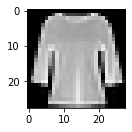

In [144]:
# Plotting 5 images, Subplot arugments represent nrows, ncols and index
# Color map is set to grey since our image dataset is grayscale
plt.subplot(231)
random_num = np.random.randint(0,len(x_train))
plt.imshow(x_train[random_num], cmap=plt.get_cmap('gray'))

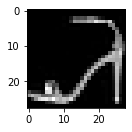

In [145]:
plt.subplot(232)
random_num = np.random.randint(0,len(x_train))
plt.imshow(x_train[random_num], cmap=plt.get_cmap('gray'))

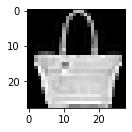

In [146]:
plt.subplot(233)
random_num = np.random.randint(0,len(x_train))
plt.imshow(x_train[random_num], cmap=plt.get_cmap('gray'))

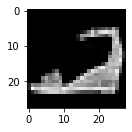

In [147]:
plt.subplot(234)
random_num = np.random.randint(0,len(x_train))
plt.imshow(x_train[random_num], cmap=plt.get_cmap('gray'))

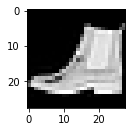

In [148]:
plt.subplot(235)
random_num = np.random.randint(0,len(x_train))
plt.imshow(x_train[random_num], cmap=plt.get_cmap('gray'))

In [149]:
# Visualize the images
plt.show()


In [150]:
"""### Let's create our model"""

#Import necessary keras specific libraries

from keras.utils import np_utils
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras import backend as K


In [151]:
# Setting Training Parameters like batch_size, epochs
batch_size = 128
epochs = 5

In [152]:
# Storing the number of rows and columns
img_rows = x_train[0].shape[0]
img_cols = x_train[1].shape[0]


In [153]:
''' Getting the data in the right 'shape' as required by Keras i.e. adding a 4th 
dimension to our data thereby changing the original image shape of (60000,28,28) 
to (60000,28,28,1)'''
x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)


In [154]:
# Storing the shape of a single image 
input_shape = (img_rows, img_cols, 1)


In [155]:
# Changing image type to float32 data type
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

In [156]:
# Normalizing the data by changing the image pixel range from (0 to 255) to (0 to 1)
x_train /= 255
x_test /= 255

In [157]:
# Performing one hot encoding
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

In [158]:
# Calculate the number of classes and number of pixels 
num_classes = y_test.shape[1]
num_pixels = x_train.shape[1] * x_train.shape[2]

In [159]:
import tensorflow as tf

In [160]:
# Create CNN model
model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(BatchNormalization())

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())

model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss = 'categorical_crossentropy',
              optimizer = tf.keras.optimizers.Adam(),
              metrics = ['accuracy'])

print(model.summary())

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_22 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 batch_normalization_33 (Bat  (None, 26, 26, 32)       128       
 chNormalization)                                                
                                                                 
 conv2d_23 (Conv2D)          (None, 24, 24, 64)        18496     
                                                                 
 batch_normalization_34 (Bat  (None, 24, 24, 64)       256       
 chNormalization)                                                
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 12, 12, 64)       0         
 g2D)                                                            
                                                     

In [161]:
"""### Let's train our model"""

model_fitting = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/5
469/469 [==============================] - 182s 386ms/step - loss: 0.4374 - accuracy: 0.8483 - val_loss: 1.1696 - val_accuracy: 0.5983
Epoch 2/5
469/469 [==============================] - 181s 386ms/step - loss: 0.2843 - accuracy: 0.8989 - val_loss: 0.2552 - val_accuracy: 0.9067
Epoch 3/5
469/469 [==============================] - 179s 383ms/step - loss: 0.2381 - accuracy: 0.9148 - val_loss: 0.2502 - val_accuracy: 0.9061
Epoch 4/5
469/469 [==============================] - 184s 392ms/step - loss: 0.2093 - accuracy: 0.9242 - val_loss: 0.2418 - val_accuracy: 0.9121
Epoch 5/5
469/469 [==============================] - 182s 388ms/step - loss: 0.1902 - accuracy: 0.9316 - val_loss: 0.2155 - val_accuracy: 0.9224
Test loss: 0.2155192643404007
Test accuracy: 0.9223999977111816


In [162]:
# Configuration related preprocessing step before mounting the drive
!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse
from google.colab import auth
auth.authenticate_user()
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()
import getpass
!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}

E: Package 'python-software-properties' has no installation candidate
Selecting previously unselected package google-drive-ocamlfuse.
(Reading database ... 155514 files and directories currently installed.)
Preparing to unpack .../google-drive-ocamlfuse_0.7.27-0ubuntu1~ubuntu18.04.1_amd64.deb ...
Unpacking google-drive-ocamlfuse (0.7.27-0ubuntu1~ubuntu18.04.1) ...
Setting up google-drive-ocamlfuse (0.7.27-0ubuntu1~ubuntu18.04.1) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=None&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force
··········
https://accounts.google.com/o/oauth2/auth?client_id=None
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=None&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2

In [163]:
#Mount the google drive
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [166]:
# Save the model with the name clothing_classification_model
model.save('clothing_classification_model.h5')

In [167]:
# Import few more necessary libraries.
from keras.models import load_model
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array


In [168]:
# Function to load and prepare the image in right shape
def load_image(filename):
	# Load the image
	img = load_img(filename, grayscale=True, target_size=(28, 28))
	# Convert the image to array
	img = img_to_array(img)
	# Reshape the image into a sample of 1 channel
	img = img.reshape(1, 28, 28, 1)
	# Prepare it as pixel data
	img = img.astype('float32')
	img = img / 255.0
	return img

In [180]:
# Load an image and predict the apparel class
img = load_image('sandal.jpg')
# Load the saved model
model = load_model('clothing_classification_model.h5')
# Predict the apparel class
class_prediction = model.predict(img)
classes_x=np.argmax(class_prediction,axis=1)
print(class_prediction[0])


/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/utils.py:107: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


[3.6228802e-03 3.9202254e-03 1.0579209e-03 1.6788012e-04 1.7884964e-04
 1.6467361e-01 3.6830199e-03 5.2585812e-05 8.2243973e-01 2.0338444e-04]


In [179]:
#Map apparel category with the numerical class
if classes_x[0] == 0:
  product = "T-shirt/top"
elif classes_x[0] == 1:
  product = "Trouser"
elif classes_x[0] == 2:
  product = "Pullover"
elif classes_x[0] == 3:
  product = "Dress"
elif classes_x[0] == 4:
  product = "Coat"
elif classes_x[0] == 5:
  product = "Sandal"
elif classes_x[0] == 6:
  product = "Shirt"
elif classes_x[0] == 7:
  product = "Sneaker"
elif classes_x[0] == 8:
  product = "Bag"
else:
  product = "Ankle boot"

print(product)


Bag
